# "The Office project"

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
matplotlib.rcParams['pdf.fonttype'] = 42
import re
import numpy as np


%matplotlib inline

In [2]:
df = pd.read_csv("the-office-lines - scripts.csv")

In [3]:
df

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False
5,6,1,1,2,"[on the phone] Yes, I'd like to speak to your ...",Michael,False
6,7,1,1,3,"I've, uh, I've been at Dunder Mifflin for 12 y...",Michael,False
7,8,1,1,3,Well. I don't know.,Pam,False
8,9,1,1,3,"If you think she's cute now, you should have s...",Michael,False
9,10,1,1,3,What?,Pam,False


In [4]:
len(df)

59909

In [5]:
df.dtypes

id            int64
season        int64
episode       int64
scene         int64
line_text    object
speaker      object
deleted        bool
dtype: object

In [6]:
df['line_text'] = df['line_text'].str.replace(r"���", "'")

In [7]:
df[(df['id'] == 2591)]

,id,season,episode,scene,line_text,speaker,deleted
2590,2591,2,2,34,Does that include 'That's What She Said'?,Jim,False


In [8]:
df[(df['id'] == 2545)]

,id,season,episode,scene,line_text,speaker,deleted
2544,2545,2,2,24,That's what she said. Pam?,Michael,False


In [9]:
df.head()

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False


### Whos speak the most often in all the seasons?

In [10]:
characters = df['speaker'].value_counts().head(20)
characters

Michael     12137
Dwight       7529
Jim          6814
Pam          5375
Andy         3968
Kevin        1708
Angela       1695
Oscar        1490
Erin         1469
Ryan         1379
Darryl       1243
Phyllis      1071
Kelly         956
Jan           949
Toby          936
Stanley       761
Meredith      645
Holly         608
Nellie        529
Creed         456
Name: speaker, dtype: int64

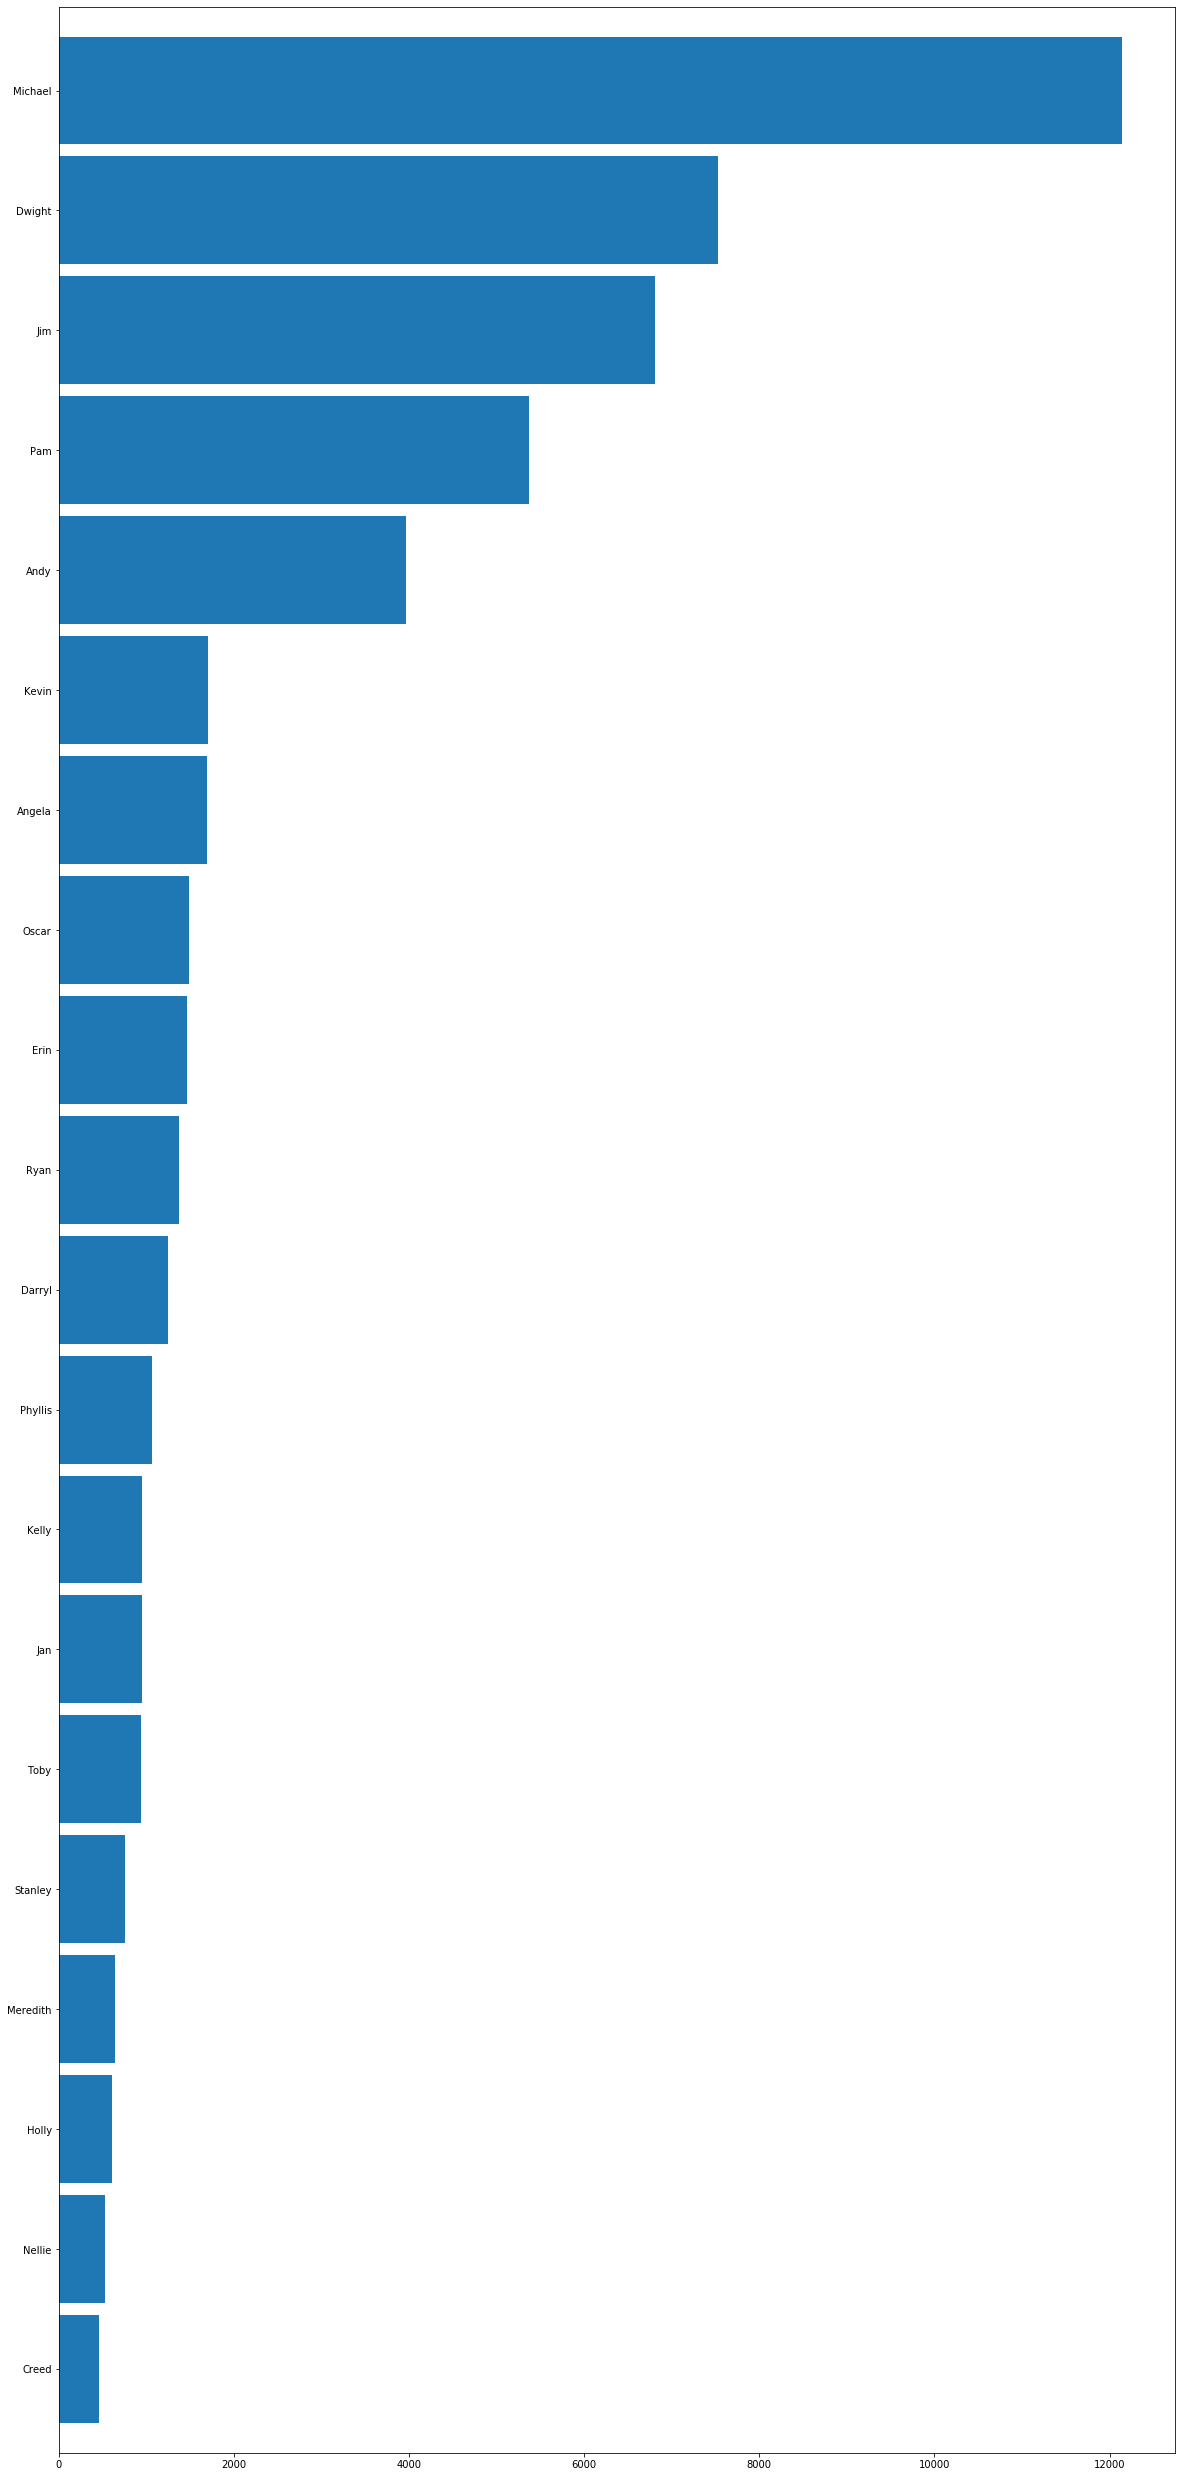

In [11]:
characters.sort_values().plot(x='speaker', y='season', kind='barh', width = 0.9, figsize = (20, 45))
plt.savefig("most_interventions1.pdf")

### Who speak the most in all the seasons?

In [12]:
michael_lenght = []
df['speaker'] = df['speaker'].astype('str')

lines = df[(df['speaker'] == 'Michael')] 
for index, line in lines.iterrows():
    lenght = len(line['line_text'])
    michael_lenght.append(lenght)
sum(michael_lenght)
        

942098

In [13]:
dwight_lenght = []
df['speaker'] = df['speaker'].astype('str') 
lines = df[(df['speaker']== 'Dwight')]
for index, line in lines.iterrows():
    lenght = len(line['line_text'])
    dwight_lenght.append(lenght)
sum(dwight_lenght)

492692

In [14]:
jim_lenght = []
df['speaker'] = df['speaker'].astype('str') 
lines = df[(df['speaker']== 'Jim')]
for index, line in lines.iterrows():
    lenght = len(line['line_text'])
    jim_lenght.append(lenght)
sum(jim_lenght)

353194

In [15]:
pam_lenght = []
df['speaker'] = df['speaker'].astype('str') 
lines = df[(df['speaker']== 'Pam')]
for index, line in lines.iterrows():
    lenght = len(line['line_text'])
    pam_lenght.append(lenght)
sum(pam_lenght)

266077

In [16]:
andy_lenght = []
df['speaker'] = df['speaker'].astype('str') 
lines = df[(df['speaker']== 'Andy')]
for index, line in lines.iterrows():
    lenght = len(line['line_text'])
    andy_lenght.append(lenght)
sum(andy_lenght)

269564

In [17]:
stanley_lenght = []
df['speaker'] = df['speaker'].astype('str') 
lines = df[(df['speaker']== 'Stanley')]
for index, line in lines.iterrows():
    lenght = len(line['line_text'])
    stanley_lenght.append(lenght)
sum(stanley_lenght)

35912

In [18]:
oscar_lenght = []
df['speaker'] = df['speaker'].astype('str') 
lines = df[(df['speaker']== 'Oscar')]
for index, line in lines.iterrows():
    lenght = len(line['line_text'])
    oscar_lenght.append(lenght)
sum(oscar_lenght)

75068

In [19]:
kelly_lenght = []
df['speaker'] = df['speaker'].astype('str') 
lines = df[(df['speaker']== 'Kelly')]
for index, line in lines.iterrows():
    lenght = len(line['line_text'])
    kelly_lenght.append(lenght)
sum(kelly_lenght)

56402

In [20]:
kevin_lenght = []
df['speaker'] = df['speaker'].astype('str') 
lines = df[(df['speaker']== 'Kevin')]
for index, line in lines.iterrows():
    lenght = len(line['line_text'])
    kevin_lenght.append(lenght)
sum(kevin_lenght)

80196

In [21]:
angela_lenght = []
df['speaker'] = df['speaker'].astype('str') 
lines = df[(df['speaker']== 'Angela')]
for index, line in lines.iterrows():
    lenght = len(line['line_text'])
    angela_lenght.append(lenght)
sum(angela_lenght)

83327

In [22]:
erin_lenght = []
df['speaker'] = df['speaker'].astype('str') 
lines = df[(df['speaker']== 'Erin')]
for index, line in lines.iterrows():
    lenght = len(line['line_text'])
    erin_lenght.append(lenght)
sum(erin_lenght)

75020

In [23]:
ryan_lenght = []
df['speaker'] = df['speaker'].astype('str') 
lines = df[(df['speaker']== 'Ryan')]
for index, line in lines.iterrows():
    lenght = len(line['line_text'])
    ryan_lenght.append(lenght)
sum(ryan_lenght)

75167

In [24]:
darryl_lenght = []
df['speaker'] = df['speaker'].astype('str') 
lines = df[(df['speaker']== 'Darryl')]
for index, line in lines.iterrows():
    lenght = len(line['line_text'])
    darryl_lenght.append(lenght)
sum(darryl_lenght)

64158

In [25]:
jan_lenght = []
df['speaker'] = df['speaker'].astype('str') 
lines = df[(df['speaker']== 'Jan')]
for index, line in lines.iterrows():
    lenght = len(line['line_text'])
    jan_lenght.append(lenght)
sum(jan_lenght)

52278

In [26]:
phyllis_lenght = []
df['speaker'] = df['speaker'].astype('str') 
lines = df[(df['speaker']== 'Phyllis')]
for index, line in lines.iterrows():
    lenght = len(line['line_text'])
    phyllis_lenght.append(lenght)
sum(phyllis_lenght)

46782

In [27]:
meredith_lenght = []
df['speaker'] = df['speaker'].astype('str') 
lines = df[(df['speaker']== 'Meredith')]
for index, line in lines.iterrows():
    lenght = len(line['line_text'])
    meredith_lenght.append(lenght)
sum(meredith_lenght)

29340

In [28]:
creed_lenght = []
df['speaker'] = df['speaker'].astype('str') 
lines = df[(df['speaker']== 'Creed')]
for index, line in lines.iterrows():
    lenght = len(line['line_text'])
    creed_lenght.append(lenght)
sum(creed_lenght)

26709

In [29]:
toby_lenght = []
df['speaker'] = df['speaker'].astype('str') 
lines = df[(df['speaker']== 'Toby')]
for index, line in lines.iterrows():
    lenght = len(line['line_text'])
    toby_lenght.append(lenght)
sum(toby_lenght)

51754

In [30]:
holly_lenght = []
df['speaker'] = df['speaker'].astype('str') 
lines = df[(df['speaker']== 'Holly')]
for index, line in lines.iterrows():
    lenght = len(line['line_text'])
    holly_lenght.append(lenght)
sum(holly_lenght)

28295

### Who speek the most per season

In [31]:
df['season'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [32]:
 df['speaker'].value_counts().head(20).index

Index(['Michael', 'Dwight', 'Jim', 'Pam', 'Andy', 'Kevin', 'Angela', 'Oscar',
       'Erin', 'Ryan', 'Darryl', 'Phyllis', 'Kelly', 'Jan', 'Toby', 'Stanley',
       'Meredith', 'Holly', 'Nellie', 'Creed'],
      dtype='object')

In [33]:
import itertools

In [34]:
df.head()

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False


In [36]:
season_chars=list(itertools.product(list(df['season'].unique()), list(df['speaker'].value_counts().head(20).index)))


In [37]:
season_chars

[(1, 'Michael'),
 (1, 'Dwight'),
 (1, 'Jim'),
 (1, 'Pam'),
 (1, 'Andy'),
 (1, 'Kevin'),
 (1, 'Angela'),
 (1, 'Oscar'),
 (1, 'Erin'),
 (1, 'Ryan'),
 (1, 'Darryl'),
 (1, 'Phyllis'),
 (1, 'Kelly'),
 (1, 'Jan'),
 (1, 'Toby'),
 (1, 'Stanley'),
 (1, 'Meredith'),
 (1, 'Holly'),
 (1, 'Nellie'),
 (1, 'Creed'),
 (2, 'Michael'),
 (2, 'Dwight'),
 (2, 'Jim'),
 (2, 'Pam'),
 (2, 'Andy'),
 (2, 'Kevin'),
 (2, 'Angela'),
 (2, 'Oscar'),
 (2, 'Erin'),
 (2, 'Ryan'),
 (2, 'Darryl'),
 (2, 'Phyllis'),
 (2, 'Kelly'),
 (2, 'Jan'),
 (2, 'Toby'),
 (2, 'Stanley'),
 (2, 'Meredith'),
 (2, 'Holly'),
 (2, 'Nellie'),
 (2, 'Creed'),
 (3, 'Michael'),
 (3, 'Dwight'),
 (3, 'Jim'),
 (3, 'Pam'),
 (3, 'Andy'),
 (3, 'Kevin'),
 (3, 'Angela'),
 (3, 'Oscar'),
 (3, 'Erin'),
 (3, 'Ryan'),
 (3, 'Darryl'),
 (3, 'Phyllis'),
 (3, 'Kelly'),
 (3, 'Jan'),
 (3, 'Toby'),
 (3, 'Stanley'),
 (3, 'Meredith'),
 (3, 'Holly'),
 (3, 'Nellie'),
 (3, 'Creed'),
 (4, 'Michael'),
 (4, 'Dwight'),
 (4, 'Jim'),
 (4, 'Pam'),
 (4, 'Andy'),
 (4, 'Kevin'),
 (4

In [38]:
sea_char_result={}
for season_char in season_chars:
    lines = df[(df['speaker'] == season_char[1])& (df['season'] == season_char[0])]  
    speeches_lenght = []
    for index, line in lines.iterrows():
        lenght = len(line['line_text'])
        speeches_lenght.append(lenght)
    sea_char_result[season_char]=sum(speeches_lenght)
            

In [39]:
sea_char_result

{(1, 'Michael'): 67009,
 (1, 'Dwight'): 19659,
 (1, 'Jim'): 15777,
 (1, 'Pam'): 7864,
 (1, 'Andy'): 0,
 (1, 'Kevin'): 1014,
 (1, 'Angela'): 1318,
 (1, 'Oscar'): 2234,
 (1, 'Erin'): 0,
 (1, 'Ryan'): 1726,
 (1, 'Darryl'): 583,
 (1, 'Phyllis'): 409,
 (1, 'Kelly'): 124,
 (1, 'Jan'): 1876,
 (1, 'Toby'): 467,
 (1, 'Stanley'): 870,
 (1, 'Meredith'): 845,
 (1, 'Holly'): 0,
 (1, 'Nellie'): 0,
 (1, 'Creed'): 0,
 (2, 'Michael'): 186616,
 (2, 'Dwight'): 63731,
 (2, 'Jim'): 46172,
 (2, 'Pam'): 33420,
 (2, 'Andy'): 0,
 (2, 'Kevin'): 6125,
 (2, 'Angela'): 6692,
 (2, 'Oscar'): 5748,
 (2, 'Erin'): 0,
 (2, 'Ryan'): 8625,
 (2, 'Darryl'): 3316,
 (2, 'Phyllis'): 4465,
 (2, 'Kelly'): 7261,
 (2, 'Jan'): 14470,
 (2, 'Toby'): 7335,
 (2, 'Stanley'): 4329,
 (2, 'Meredith'): 1711,
 (2, 'Holly'): 0,
 (2, 'Nellie'): 0,
 (2, 'Creed'): 3610,
 (3, 'Michael'): 155679,
 (3, 'Dwight'): 56421,
 (3, 'Jim'): 34536,
 (3, 'Pam'): 32190,
 (3, 'Andy'): 26094,
 (3, 'Kevin'): 9546,
 (3, 'Angela'): 13589,
 (3, 'Oscar'): 3816,
 (3,

In [41]:
df1 = pd.DataFrame.from_dict(sea_char_result, orient='index', columns=["count"])


In [42]:
df1["season_char"] =df1.index

In [43]:
df1=df1.reset_index(drop=True)

In [44]:
df1["season"]=df1["season_char"].apply(lambda x: x[0])

In [45]:
df1["char"]=df1["season_char"].apply(lambda x: x[1])

In [46]:
df1=df1.drop(columns=["season_char"])

In [47]:
df1

,count,season,char
0,67009,1,Michael
1,19659,1,Dwight
2,15777,1,Jim
3,7864,1,Pam
4,0,1,Andy
5,1014,1,Kevin
6,1318,1,Angela
7,2234,1,Oscar
8,0,1,Erin
9,1726,1,Ryan


In [48]:
df1['count'].max()

186616

ValueError: Invalid RGBA argument: 0      #E83C2A
1      #FFEA5B
2      #9FFF57
3      #249FFF
4         grey
5         grey
6         grey
7         grey
8         grey
9         grey
10        grey
11        grey
12        grey
13        grey
14        grey
15        grey
16        grey
17        grey
18        grey
19        grey
20     #E83C2A
21     #FFEA5B
22     #9FFF57
23     #249FFF
24        grey
25        grey
26        grey
27        grey
28        grey
29        grey
        ...   
150       grey
151       grey
152       grey
153       grey
154       grey
155       grey
156       grey
157       grey
158       grey
159       grey
160    #E83C2A
161    #FFEA5B
162    #9FFF57
163    #249FFF
164       grey
165       grey
166       grey
167       grey
168       grey
169       grey
170       grey
171       grey
172       grey
173       grey
174       grey
175       grey
176       grey
177       grey
178       grey
179       grey
Length: 180, dtype: object

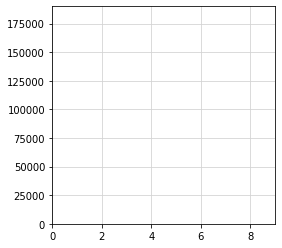

In [49]:
def build_colors(df1):
    if df1['char'] == 'Michael':
        return '#E83C2A'
    elif df1['char'] == 'Dwight':
        return '#FFEA5B'
    elif df1['char'] == 'Jim':
        return '#9FFF57'
    elif df1['char'] == 'Pam':
        return '#249FFF'
    else:
        return 'grey'
colors = df1.reset_index().apply(build_colors, axis=1)

fig, ax = plt.subplots(figsize=(4, 4))
ax.set_xlim(0, 9)
ax.set_ylim(0, 190000)
ax.set_facecolor('white')
ax.grid(True, color = 'lightgrey')
ax.set_axisbelow(True)

sns.regplot('season', 'count', data = df1, marker='.', scatter=True, color = colors)


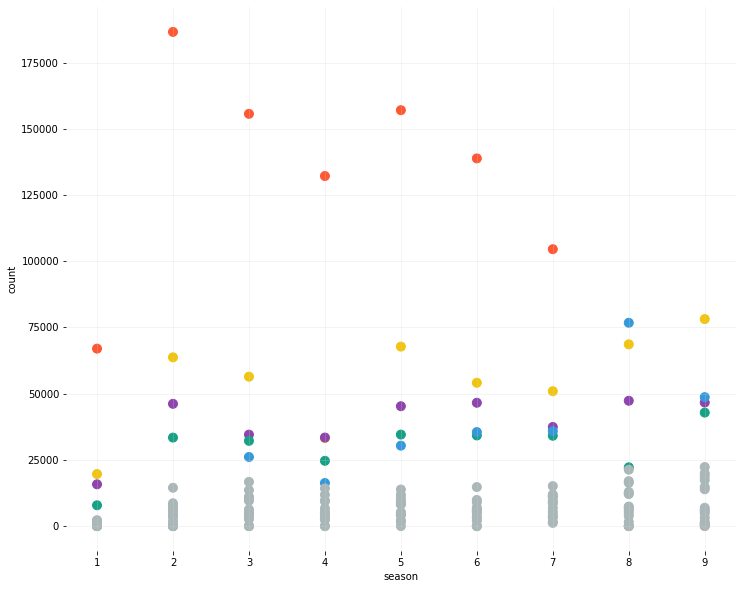

In [50]:
def build_colors(df1):
    if df1['char'] == 'Michael':
        return '#FF5733'
    elif df1['char'] == 'Dwight':
        return '#F1C40F'
    elif df1['char'] == 'Jim':
        return '#8E44AD'
    elif df1['char'] == 'Pam':
        return '#16A085'
    elif df1['char'] == 'Andy':
        return '#3498DB'
    else:
        return '#AAB7B8'
colors = df1.reset_index().apply(build_colors, axis=1)

df1.plot(x='season', y='count', color=colors, kind='scatter', figsize = (12, 10), marker='o', s=80, alpha=1, )
plt.grid(color= 'lightgrey', alpha=0.3, zorder=0)

plt.box(False)

plt.savefig("lenght_speech_per_season.pdf")

### Who said the most often "Thats what she said!"?

In [50]:
counts = 0
Thatswhat = []
df['line_text'] = df['line_text'].astype('str') 
for line in df['line_text']:
    number = line.count("That's what she said")
    number1 = line.count("THAT'S WHAT SHE SAID")
    number2 = line.count("That's What She Said")
    number3 = line.count("that's what she said")
    number4 = line.count("that's what he said")
    number5 = line.count("That's what he said")
    good_number = number + number1 + number2 + number3 + number4 + number5
    counts = counts + 1
    Thatswhat.append(good_number)

In [51]:
df['number_of_Thatswhat'] = Thatswhat


In [49]:
df[(df['season'] == 2) & (df['episode'] == 2) &(df['number_of_Thatswhat']!=0)]

,id,season,episode,scene,line_text,speaker,deleted,number_of_Thatswhat
2544,2545,2,2,24,That's what she said. Pam?,Michael,False,1
2590,2591,2,2,34,Does that include 'That's What She Said'?,Jim,False,1
2593,2594,2,2,34,THAT'S WHAT SHE SAID!,Michael,False,1


In [50]:
sum(df['number_of_Thatswhat'])

43

In [51]:
df[(df['number_of_Thatswhat']!=0)].head()

,id,season,episode,scene,line_text,speaker,deleted,number_of_Thatswhat
1789,1790,1,6,26,That's what he said.,Pam,False,1
2544,2545,2,2,24,That's what she said. Pam?,Michael,False,1
2590,2591,2,2,34,Does that include 'That's What She Said'?,Jim,False,1
2593,2594,2,2,34,THAT'S WHAT SHE SAID!,Michael,False,1
3616,3617,2,5,14,I'm not saying that's what he said.,Michael,False,1


In [52]:
count_michael = 0
count_jim = 0
count_creed = 0
count_holly = 0
count_dwight = 0
count_jan = 0
count_pam = 0
count_stanley = 0
count_david = 0
df['speaker'] = df['speaker'].astype('str') 
lines = df[(df['number_of_Thatswhat']!=0)]

for index, line in lines.iterrows():
    if line['speaker'] == 'Michael':
        count_michael = count_michael + 1
    elif line['speaker'] == 'Jim':
        count_jim = count_jim + 1
    elif line['speaker'] == 'Creed':
        count_creed = count_creed + 1
    elif line['speaker'] == 'Holly':
        count_holly = count_holly + 1
    elif line['speaker'] == 'Dwight':
        count_dwight = count_dwight + 1
    elif line['speaker'] == 'Jan':
        count_jan = count_jan + 1
    elif line['speaker'] == 'Pam':
        count_pam = count_pam + 1
    elif line['speaker'] == 'Stanley':
        count_stanley = count_stanley + 1
    elif line['speaker'] == 'David':
        count_david = count_david + 1
    elif line['speaker'] == 'Everyone':
        count_stanley = count_stanley + 1
        count_pam = count_pam + 1
        count_jan = count_jan + 1
        count_dwight = count_dwight + 1
        count_holly = count_holly + 1
        count_creed = count_creed + 1
        count_jim = count_jim + 1
        count_michael = count_michael + 1
    else:
        pass
        
print(count_michael, count_dwight, count_pam, count_jim)
print(count_michael + count_jim + count_creed + count_holly + count_dwight + count_jan + count_pam + count_stanley)    
    

27 5 3 3
46


In [53]:
df2 = df[(df['number_of_Thatswhat']!=0)]


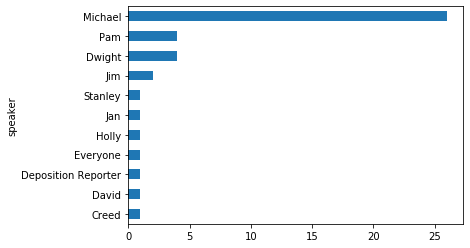

In [54]:
df2.groupby(["speaker"]).number_of_Thatswhat.sum().sort_values().plot(kind='barh')

### Trying to find the sentence just before a "thatswhat she said"

In [ ]:
df['number_of_Thatswhat'] = df['number_of_Thatswhat'].astype('int')
Reason_Thatswhat = []
lines = df
for index, line in lines.iterrows():
    if line['number_of_Thatswhat'] == 0:
        id_reason = 0
        Reason_Thatswhat.append(id_reason)
    elif line['number_of_Thatswhat'] != 0:
        id_reason = line.id - 1
        Reason_Thatswhat.append(id_reason)    
df['id_Reason_Thatswhat'] = Reason_Thatswhat

In [ ]:
for index, line in lines.iterrows():
    if line['id_Reason_Thatswhat'] == 0:
        pass
    elif line['id_Reason_Thatswhat'] > 0:
        number = line['id_Reason_Thatswhat'] - 1
        print(line['line_text'][number])

In [ ]:
df.head()

In [ ]:
for line in Reason_Thatswhat:
    if int(line['id']) == 
    print(line['line_text'])

### And count some other jokes...

In [ ]:
counts = 0
Toby = []
df['line_text'] = df['line_text'].astype('str') 
for line in df['line_text']:
    toby_count = line.count("Toby")
    counts = counts + 1
    print(f"Searching in line {counts}.")
    Toby.append(toby_count)
Toby

In [ ]:
df['number_of_Toby'] = Toby

In [ ]:
counts = 0
Cornell = []
df['line_text'] = df['line_text'].astype('str') 
for line in df['line_text']:
    cornell_count = line.count("Cornell")
    counts = counts + 1
    print(f"Searching in line {counts}.")
    Cornell.append(cornell_count)
Cornell

In [ ]:
df['Cornell'] = Cornell

In [ ]:
sum(df['Cornell'])

In [ ]:
counts = 0
Sex = []
df['line_text'] = df['line_text'].astype('str') 
for line in df['line_text']:
    sex_count = line.count("sex")
    counts = counts + 1
    print(f"Searching in line {counts}.")
    Sex.append(sex_count)
Sex

In [ ]:
df['Sex'] = Sex

In [ ]:
sum(df['Sex'])

In [ ]:
counts = 0
Work = []
df['line_text'] = df['line_text'].astype('str') 
for line in df['line_text']:
    work_count = line.count("work")
    counts = counts + 1
    print(f"Searching in line {counts}.")
    Work.append(work_count)
Work

In [ ]:
df['Work'] = Work

In [ ]:
sum(df['Work'])

In [ ]:
counts = 0
Love = []
df['line_text'] = df['line_text'].astype('str') 
for line in df['line_text']:
    love_count = line.count("love")
    counts = counts + 1
    print(f"Searching in line {counts}.")
    Love.append(love_count)
Love

In [ ]:
df['Love'] = Love

In [ ]:
sum(df['Love'])

In [ ]:
counts = 0
Prank = []
df['line_text'] = df['line_text'].astype('str') 
for line in df['line_text']:
    prank_count = line.count("prank")
    counts = counts + 1
    print(f"Searching in line {counts}.")
    Prank.append(prank_count)

In [ ]:
df['Prank'] = Prank

In [ ]:
sum(df['Prank'])

In [47]:
counts = 0
unprofessional = []
df['line_text'] = df['line_text'].astype('str') 
for line in df['line_text']:
    unprofessional_count = line.count("unprofessional")
    counts = counts + 1
    print(f"Searching in line {counts}.")
    unprofessional.append(unprofessional_count)

Searching in line 1.
Searching in line 2.
Searching in line 3.
Searching in line 4.
Searching in line 5.
Searching in line 6.
Searching in line 7.
Searching in line 8.
Searching in line 9.
Searching in line 10.
Searching in line 11.
Searching in line 12.
Searching in line 13.
Searching in line 14.
Searching in line 15.
Searching in line 16.
Searching in line 17.
Searching in line 18.
Searching in line 19.
Searching in line 20.
Searching in line 21.
Searching in line 22.
Searching in line 23.
Searching in line 24.
Searching in line 25.
Searching in line 26.
Searching in line 27.
Searching in line 28.
Searching in line 29.
Searching in line 30.
Searching in line 31.
Searching in line 32.
Searching in line 33.
Searching in line 34.
Searching in line 35.
Searching in line 36.
Searching in line 37.
Searching in line 38.
Searching in line 39.
Searching in line 40.
Searching in line 41.
Searching in line 42.
Searching in line 43.
Searching in line 44.
Searching in line 45.
Searching in line 4

Searching in line 2093.
Searching in line 2094.
Searching in line 2095.
Searching in line 2096.
Searching in line 2097.
Searching in line 2098.
Searching in line 2099.
Searching in line 2100.
Searching in line 2101.
Searching in line 2102.
Searching in line 2103.
Searching in line 2104.
Searching in line 2105.
Searching in line 2106.
Searching in line 2107.
Searching in line 2108.
Searching in line 2109.
Searching in line 2110.
Searching in line 2111.
Searching in line 2112.
Searching in line 2113.
Searching in line 2114.
Searching in line 2115.
Searching in line 2116.
Searching in line 2117.
Searching in line 2118.
Searching in line 2119.
Searching in line 2120.
Searching in line 2121.
Searching in line 2122.
Searching in line 2123.
Searching in line 2124.
Searching in line 2125.
Searching in line 2126.
Searching in line 2127.
Searching in line 2128.
Searching in line 2129.
Searching in line 2130.
Searching in line 2131.
Searching in line 2132.
Searching in line 2133.
Searching in lin

Searching in line 3405.
Searching in line 3406.
Searching in line 3407.
Searching in line 3408.
Searching in line 3409.
Searching in line 3410.
Searching in line 3411.
Searching in line 3412.
Searching in line 3413.
Searching in line 3414.
Searching in line 3415.
Searching in line 3416.
Searching in line 3417.
Searching in line 3418.
Searching in line 3419.
Searching in line 3420.
Searching in line 3421.
Searching in line 3422.
Searching in line 3423.
Searching in line 3424.
Searching in line 3425.
Searching in line 3426.
Searching in line 3427.
Searching in line 3428.
Searching in line 3429.
Searching in line 3430.
Searching in line 3431.
Searching in line 3432.
Searching in line 3433.
Searching in line 3434.
Searching in line 3435.
Searching in line 3436.
Searching in line 3437.
Searching in line 3438.
Searching in line 3439.
Searching in line 3440.
Searching in line 3441.
Searching in line 3442.
Searching in line 3443.
Searching in line 3444.
Searching in line 3445.
Searching in lin

Searching in line 5642.
Searching in line 5643.
Searching in line 5644.
Searching in line 5645.
Searching in line 5646.
Searching in line 5647.
Searching in line 5648.
Searching in line 5649.
Searching in line 5650.
Searching in line 5651.
Searching in line 5652.
Searching in line 5653.
Searching in line 5654.
Searching in line 5655.
Searching in line 5656.
Searching in line 5657.
Searching in line 5658.
Searching in line 5659.
Searching in line 5660.
Searching in line 5661.
Searching in line 5662.
Searching in line 5663.
Searching in line 5664.
Searching in line 5665.
Searching in line 5666.
Searching in line 5667.
Searching in line 5668.
Searching in line 5669.
Searching in line 5670.
Searching in line 5671.
Searching in line 5672.
Searching in line 5673.
Searching in line 5674.
Searching in line 5675.
Searching in line 5676.
Searching in line 5677.
Searching in line 5678.
Searching in line 5679.
Searching in line 5680.
Searching in line 5681.
Searching in line 5682.
Searching in lin

Searching in line 7642.
Searching in line 7643.
Searching in line 7644.
Searching in line 7645.
Searching in line 7646.
Searching in line 7647.
Searching in line 7648.
Searching in line 7649.
Searching in line 7650.
Searching in line 7651.
Searching in line 7652.
Searching in line 7653.
Searching in line 7654.
Searching in line 7655.
Searching in line 7656.
Searching in line 7657.
Searching in line 7658.
Searching in line 7659.
Searching in line 7660.
Searching in line 7661.
Searching in line 7662.
Searching in line 7663.
Searching in line 7664.
Searching in line 7665.
Searching in line 7666.
Searching in line 7667.
Searching in line 7668.
Searching in line 7669.
Searching in line 7670.
Searching in line 7671.
Searching in line 7672.
Searching in line 7673.
Searching in line 7674.
Searching in line 7675.
Searching in line 7676.
Searching in line 7677.
Searching in line 7678.
Searching in line 7679.
Searching in line 7680.
Searching in line 7681.
Searching in line 7682.
Searching in lin

Searching in line 9539.
Searching in line 9540.
Searching in line 9541.
Searching in line 9542.
Searching in line 9543.
Searching in line 9544.
Searching in line 9545.
Searching in line 9546.
Searching in line 9547.
Searching in line 9548.
Searching in line 9549.
Searching in line 9550.
Searching in line 9551.
Searching in line 9552.
Searching in line 9553.
Searching in line 9554.
Searching in line 9555.
Searching in line 9556.
Searching in line 9557.
Searching in line 9558.
Searching in line 9559.
Searching in line 9560.
Searching in line 9561.
Searching in line 9562.
Searching in line 9563.
Searching in line 9564.
Searching in line 9565.
Searching in line 9566.
Searching in line 9567.
Searching in line 9568.
Searching in line 9569.
Searching in line 9570.
Searching in line 9571.
Searching in line 9572.
Searching in line 9573.
Searching in line 9574.
Searching in line 9575.
Searching in line 9576.
Searching in line 9577.
Searching in line 9578.
Searching in line 9579.
Searching in lin

Searching in line 11641.
Searching in line 11642.
Searching in line 11643.
Searching in line 11644.
Searching in line 11645.
Searching in line 11646.
Searching in line 11647.
Searching in line 11648.
Searching in line 11649.
Searching in line 11650.
Searching in line 11651.
Searching in line 11652.
Searching in line 11653.
Searching in line 11654.
Searching in line 11655.
Searching in line 11656.
Searching in line 11657.
Searching in line 11658.
Searching in line 11659.
Searching in line 11660.
Searching in line 11661.
Searching in line 11662.
Searching in line 11663.
Searching in line 11664.
Searching in line 11665.
Searching in line 11666.
Searching in line 11667.
Searching in line 11668.
Searching in line 11669.
Searching in line 11670.
Searching in line 11671.
Searching in line 11672.
Searching in line 11673.
Searching in line 11674.
Searching in line 11675.
Searching in line 11676.
Searching in line 11677.
Searching in line 11678.
Searching in line 11679.
Searching in line 11680.


Searching in line 13270.
Searching in line 13271.
Searching in line 13272.
Searching in line 13273.
Searching in line 13274.
Searching in line 13275.
Searching in line 13276.
Searching in line 13277.
Searching in line 13278.
Searching in line 13279.
Searching in line 13280.
Searching in line 13281.
Searching in line 13282.
Searching in line 13283.
Searching in line 13284.
Searching in line 13285.
Searching in line 13286.
Searching in line 13287.
Searching in line 13288.
Searching in line 13289.
Searching in line 13290.
Searching in line 13291.
Searching in line 13292.
Searching in line 13293.
Searching in line 13294.
Searching in line 13295.
Searching in line 13296.
Searching in line 13297.
Searching in line 13298.
Searching in line 13299.
Searching in line 13300.
Searching in line 13301.
Searching in line 13302.
Searching in line 13303.
Searching in line 13304.
Searching in line 13305.
Searching in line 13306.
Searching in line 13307.
Searching in line 13308.
Searching in line 13309.


Searching in line 15010.
Searching in line 15011.
Searching in line 15012.
Searching in line 15013.
Searching in line 15014.
Searching in line 15015.
Searching in line 15016.
Searching in line 15017.
Searching in line 15018.
Searching in line 15019.
Searching in line 15020.
Searching in line 15021.
Searching in line 15022.
Searching in line 15023.
Searching in line 15024.
Searching in line 15025.
Searching in line 15026.
Searching in line 15027.
Searching in line 15028.
Searching in line 15029.
Searching in line 15030.
Searching in line 15031.
Searching in line 15032.
Searching in line 15033.
Searching in line 15034.
Searching in line 15035.
Searching in line 15036.
Searching in line 15037.
Searching in line 15038.
Searching in line 15039.
Searching in line 15040.
Searching in line 15041.
Searching in line 15042.
Searching in line 15043.
Searching in line 15044.
Searching in line 15045.
Searching in line 15046.
Searching in line 15047.
Searching in line 15048.
Searching in line 15049.


Searching in line 16724.
Searching in line 16725.
Searching in line 16726.
Searching in line 16727.
Searching in line 16728.
Searching in line 16729.
Searching in line 16730.
Searching in line 16731.
Searching in line 16732.
Searching in line 16733.
Searching in line 16734.
Searching in line 16735.
Searching in line 16736.
Searching in line 16737.
Searching in line 16738.
Searching in line 16739.
Searching in line 16740.
Searching in line 16741.
Searching in line 16742.
Searching in line 16743.
Searching in line 16744.
Searching in line 16745.
Searching in line 16746.
Searching in line 16747.
Searching in line 16748.
Searching in line 16749.
Searching in line 16750.
Searching in line 16751.
Searching in line 16752.
Searching in line 16753.
Searching in line 16754.
Searching in line 16755.
Searching in line 16756.
Searching in line 16757.
Searching in line 16758.
Searching in line 16759.
Searching in line 16760.
Searching in line 16761.
Searching in line 16762.
Searching in line 16763.


Searching in line 18313.
Searching in line 18314.
Searching in line 18315.
Searching in line 18316.
Searching in line 18317.
Searching in line 18318.
Searching in line 18319.
Searching in line 18320.
Searching in line 18321.
Searching in line 18322.
Searching in line 18323.
Searching in line 18324.
Searching in line 18325.
Searching in line 18326.
Searching in line 18327.
Searching in line 18328.
Searching in line 18329.
Searching in line 18330.
Searching in line 18331.
Searching in line 18332.
Searching in line 18333.
Searching in line 18334.
Searching in line 18335.
Searching in line 18336.
Searching in line 18337.
Searching in line 18338.
Searching in line 18339.
Searching in line 18340.
Searching in line 18341.
Searching in line 18342.
Searching in line 18343.
Searching in line 18344.
Searching in line 18345.
Searching in line 18346.
Searching in line 18347.
Searching in line 18348.
Searching in line 18349.
Searching in line 18350.
Searching in line 18351.
Searching in line 18352.


Searching in line 20103.
Searching in line 20104.
Searching in line 20105.
Searching in line 20106.
Searching in line 20107.
Searching in line 20108.
Searching in line 20109.
Searching in line 20110.
Searching in line 20111.
Searching in line 20112.
Searching in line 20113.
Searching in line 20114.
Searching in line 20115.
Searching in line 20116.
Searching in line 20117.
Searching in line 20118.
Searching in line 20119.
Searching in line 20120.
Searching in line 20121.
Searching in line 20122.
Searching in line 20123.
Searching in line 20124.
Searching in line 20125.
Searching in line 20126.
Searching in line 20127.
Searching in line 20128.
Searching in line 20129.
Searching in line 20130.
Searching in line 20131.
Searching in line 20132.
Searching in line 20133.
Searching in line 20134.
Searching in line 20135.
Searching in line 20136.
Searching in line 20137.
Searching in line 20138.
Searching in line 20139.
Searching in line 20140.
Searching in line 20141.
Searching in line 20142.


Searching in line 21735.
Searching in line 21736.
Searching in line 21737.
Searching in line 21738.
Searching in line 21739.
Searching in line 21740.
Searching in line 21741.
Searching in line 21742.
Searching in line 21743.
Searching in line 21744.
Searching in line 21745.
Searching in line 21746.
Searching in line 21747.
Searching in line 21748.
Searching in line 21749.
Searching in line 21750.
Searching in line 21751.
Searching in line 21752.
Searching in line 21753.
Searching in line 21754.
Searching in line 21755.
Searching in line 21756.
Searching in line 21757.
Searching in line 21758.
Searching in line 21759.
Searching in line 21760.
Searching in line 21761.
Searching in line 21762.
Searching in line 21763.
Searching in line 21764.
Searching in line 21765.
Searching in line 21766.
Searching in line 21767.
Searching in line 21768.
Searching in line 21769.
Searching in line 21770.
Searching in line 21771.
Searching in line 21772.
Searching in line 21773.
Searching in line 21774.


Searching in line 23194.
Searching in line 23195.
Searching in line 23196.
Searching in line 23197.
Searching in line 23198.
Searching in line 23199.
Searching in line 23200.
Searching in line 23201.
Searching in line 23202.
Searching in line 23203.
Searching in line 23204.
Searching in line 23205.
Searching in line 23206.
Searching in line 23207.
Searching in line 23208.
Searching in line 23209.
Searching in line 23210.
Searching in line 23211.
Searching in line 23212.
Searching in line 23213.
Searching in line 23214.
Searching in line 23215.
Searching in line 23216.
Searching in line 23217.
Searching in line 23218.
Searching in line 23219.
Searching in line 23220.
Searching in line 23221.
Searching in line 23222.
Searching in line 23223.
Searching in line 23224.
Searching in line 23225.
Searching in line 23226.
Searching in line 23227.
Searching in line 23228.
Searching in line 23229.
Searching in line 23230.
Searching in line 23231.
Searching in line 23232.
Searching in line 23233.


Searching in line 25141.
Searching in line 25142.
Searching in line 25143.
Searching in line 25144.
Searching in line 25145.
Searching in line 25146.
Searching in line 25147.
Searching in line 25148.
Searching in line 25149.
Searching in line 25150.
Searching in line 25151.
Searching in line 25152.
Searching in line 25153.
Searching in line 25154.
Searching in line 25155.
Searching in line 25156.
Searching in line 25157.
Searching in line 25158.
Searching in line 25159.
Searching in line 25160.
Searching in line 25161.
Searching in line 25162.
Searching in line 25163.
Searching in line 25164.
Searching in line 25165.
Searching in line 25166.
Searching in line 25167.
Searching in line 25168.
Searching in line 25169.
Searching in line 25170.
Searching in line 25171.
Searching in line 25172.
Searching in line 25173.
Searching in line 25174.
Searching in line 25175.
Searching in line 25176.
Searching in line 25177.
Searching in line 25178.
Searching in line 25179.
Searching in line 25180.


Searching in line 27136.
Searching in line 27137.
Searching in line 27138.
Searching in line 27139.
Searching in line 27140.
Searching in line 27141.
Searching in line 27142.
Searching in line 27143.
Searching in line 27144.
Searching in line 27145.
Searching in line 27146.
Searching in line 27147.
Searching in line 27148.
Searching in line 27149.
Searching in line 27150.
Searching in line 27151.
Searching in line 27152.
Searching in line 27153.
Searching in line 27154.
Searching in line 27155.
Searching in line 27156.
Searching in line 27157.
Searching in line 27158.
Searching in line 27159.
Searching in line 27160.
Searching in line 27161.
Searching in line 27162.
Searching in line 27163.
Searching in line 27164.
Searching in line 27165.
Searching in line 27166.
Searching in line 27167.
Searching in line 27168.
Searching in line 27169.
Searching in line 27170.
Searching in line 27171.
Searching in line 27172.
Searching in line 27173.
Searching in line 27174.
Searching in line 27175.


Searching in line 29136.
Searching in line 29137.
Searching in line 29138.
Searching in line 29139.
Searching in line 29140.
Searching in line 29141.
Searching in line 29142.
Searching in line 29143.
Searching in line 29144.
Searching in line 29145.
Searching in line 29146.
Searching in line 29147.
Searching in line 29148.
Searching in line 29149.
Searching in line 29150.
Searching in line 29151.
Searching in line 29152.
Searching in line 29153.
Searching in line 29154.
Searching in line 29155.
Searching in line 29156.
Searching in line 29157.
Searching in line 29158.
Searching in line 29159.
Searching in line 29160.
Searching in line 29161.
Searching in line 29162.
Searching in line 29163.
Searching in line 29164.
Searching in line 29165.
Searching in line 29166.
Searching in line 29167.
Searching in line 29168.
Searching in line 29169.
Searching in line 29170.
Searching in line 29171.
Searching in line 29172.
Searching in line 29173.
Searching in line 29174.
Searching in line 29175.


Searching in line 31112.
Searching in line 31113.
Searching in line 31114.
Searching in line 31115.
Searching in line 31116.
Searching in line 31117.
Searching in line 31118.
Searching in line 31119.
Searching in line 31120.
Searching in line 31121.
Searching in line 31122.
Searching in line 31123.
Searching in line 31124.
Searching in line 31125.
Searching in line 31126.
Searching in line 31127.
Searching in line 31128.
Searching in line 31129.
Searching in line 31130.
Searching in line 31131.
Searching in line 31132.
Searching in line 31133.
Searching in line 31134.
Searching in line 31135.
Searching in line 31136.
Searching in line 31137.
Searching in line 31138.
Searching in line 31139.
Searching in line 31140.
Searching in line 31141.
Searching in line 31142.
Searching in line 31143.
Searching in line 31144.
Searching in line 31145.
Searching in line 31146.
Searching in line 31147.
Searching in line 31148.
Searching in line 31149.
Searching in line 31150.
Searching in line 31151.


Searching in line 33039.
Searching in line 33040.
Searching in line 33041.
Searching in line 33042.
Searching in line 33043.
Searching in line 33044.
Searching in line 33045.
Searching in line 33046.
Searching in line 33047.
Searching in line 33048.
Searching in line 33049.
Searching in line 33050.
Searching in line 33051.
Searching in line 33052.
Searching in line 33053.
Searching in line 33054.
Searching in line 33055.
Searching in line 33056.
Searching in line 33057.
Searching in line 33058.
Searching in line 33059.
Searching in line 33060.
Searching in line 33061.
Searching in line 33062.
Searching in line 33063.
Searching in line 33064.
Searching in line 33065.
Searching in line 33066.
Searching in line 33067.
Searching in line 33068.
Searching in line 33069.
Searching in line 33070.
Searching in line 33071.
Searching in line 33072.
Searching in line 33073.
Searching in line 33074.
Searching in line 33075.
Searching in line 33076.
Searching in line 33077.
Searching in line 33078.


Searching in line 34334.
Searching in line 34335.
Searching in line 34336.
Searching in line 34337.
Searching in line 34338.
Searching in line 34339.
Searching in line 34340.
Searching in line 34341.
Searching in line 34342.
Searching in line 34343.
Searching in line 34344.
Searching in line 34345.
Searching in line 34346.
Searching in line 34347.
Searching in line 34348.
Searching in line 34349.
Searching in line 34350.
Searching in line 34351.
Searching in line 34352.
Searching in line 34353.
Searching in line 34354.
Searching in line 34355.
Searching in line 34356.
Searching in line 34357.
Searching in line 34358.
Searching in line 34359.
Searching in line 34360.
Searching in line 34361.
Searching in line 34362.
Searching in line 34363.
Searching in line 34364.
Searching in line 34365.
Searching in line 34366.
Searching in line 34367.
Searching in line 34368.
Searching in line 34369.
Searching in line 34370.
Searching in line 34371.
Searching in line 34372.
Searching in line 34373.


Searching in line 35962.
Searching in line 35963.
Searching in line 35964.
Searching in line 35965.
Searching in line 35966.
Searching in line 35967.
Searching in line 35968.
Searching in line 35969.
Searching in line 35970.
Searching in line 35971.
Searching in line 35972.
Searching in line 35973.
Searching in line 35974.
Searching in line 35975.
Searching in line 35976.
Searching in line 35977.
Searching in line 35978.
Searching in line 35979.
Searching in line 35980.
Searching in line 35981.
Searching in line 35982.
Searching in line 35983.
Searching in line 35984.
Searching in line 35985.
Searching in line 35986.
Searching in line 35987.
Searching in line 35988.
Searching in line 35989.
Searching in line 35990.
Searching in line 35991.
Searching in line 35992.
Searching in line 35993.
Searching in line 35994.
Searching in line 35995.
Searching in line 35996.
Searching in line 35997.
Searching in line 35998.
Searching in line 35999.
Searching in line 36000.
Searching in line 36001.


Searching in line 37850.
Searching in line 37851.
Searching in line 37852.
Searching in line 37853.
Searching in line 37854.
Searching in line 37855.
Searching in line 37856.
Searching in line 37857.
Searching in line 37858.
Searching in line 37859.
Searching in line 37860.
Searching in line 37861.
Searching in line 37862.
Searching in line 37863.
Searching in line 37864.
Searching in line 37865.
Searching in line 37866.
Searching in line 37867.
Searching in line 37868.
Searching in line 37869.
Searching in line 37870.
Searching in line 37871.
Searching in line 37872.
Searching in line 37873.
Searching in line 37874.
Searching in line 37875.
Searching in line 37876.
Searching in line 37877.
Searching in line 37878.
Searching in line 37879.
Searching in line 37880.
Searching in line 37881.
Searching in line 37882.
Searching in line 37883.
Searching in line 37884.
Searching in line 37885.
Searching in line 37886.
Searching in line 37887.
Searching in line 37888.
Searching in line 37889.


Searching in line 39633.
Searching in line 39634.
Searching in line 39635.
Searching in line 39636.
Searching in line 39637.
Searching in line 39638.
Searching in line 39639.
Searching in line 39640.
Searching in line 39641.
Searching in line 39642.
Searching in line 39643.
Searching in line 39644.
Searching in line 39645.
Searching in line 39646.
Searching in line 39647.
Searching in line 39648.
Searching in line 39649.
Searching in line 39650.
Searching in line 39651.
Searching in line 39652.
Searching in line 39653.
Searching in line 39654.
Searching in line 39655.
Searching in line 39656.
Searching in line 39657.
Searching in line 39658.
Searching in line 39659.
Searching in line 39660.
Searching in line 39661.
Searching in line 39662.
Searching in line 39663.
Searching in line 39664.
Searching in line 39665.
Searching in line 39666.
Searching in line 39667.
Searching in line 39668.
Searching in line 39669.
Searching in line 39670.
Searching in line 39671.
Searching in line 39672.


Searching in line 41632.
Searching in line 41633.
Searching in line 41634.
Searching in line 41635.
Searching in line 41636.
Searching in line 41637.
Searching in line 41638.
Searching in line 41639.
Searching in line 41640.
Searching in line 41641.
Searching in line 41642.
Searching in line 41643.
Searching in line 41644.
Searching in line 41645.
Searching in line 41646.
Searching in line 41647.
Searching in line 41648.
Searching in line 41649.
Searching in line 41650.
Searching in line 41651.
Searching in line 41652.
Searching in line 41653.
Searching in line 41654.
Searching in line 41655.
Searching in line 41656.
Searching in line 41657.
Searching in line 41658.
Searching in line 41659.
Searching in line 41660.
Searching in line 41661.
Searching in line 41662.
Searching in line 41663.
Searching in line 41664.
Searching in line 41665.
Searching in line 41666.
Searching in line 41667.
Searching in line 41668.
Searching in line 41669.
Searching in line 41670.
Searching in line 41671.


Searching in line 43110.
Searching in line 43111.
Searching in line 43112.
Searching in line 43113.
Searching in line 43114.
Searching in line 43115.
Searching in line 43116.
Searching in line 43117.
Searching in line 43118.
Searching in line 43119.
Searching in line 43120.
Searching in line 43121.
Searching in line 43122.
Searching in line 43123.
Searching in line 43124.
Searching in line 43125.
Searching in line 43126.
Searching in line 43127.
Searching in line 43128.
Searching in line 43129.
Searching in line 43130.
Searching in line 43131.
Searching in line 43132.
Searching in line 43133.
Searching in line 43134.
Searching in line 43135.
Searching in line 43136.
Searching in line 43137.
Searching in line 43138.
Searching in line 43139.
Searching in line 43140.
Searching in line 43141.
Searching in line 43142.
Searching in line 43143.
Searching in line 43144.
Searching in line 43145.
Searching in line 43146.
Searching in line 43147.
Searching in line 43148.
Searching in line 43149.


Searching in line 45008.
Searching in line 45009.
Searching in line 45010.
Searching in line 45011.
Searching in line 45012.
Searching in line 45013.
Searching in line 45014.
Searching in line 45015.
Searching in line 45016.
Searching in line 45017.
Searching in line 45018.
Searching in line 45019.
Searching in line 45020.
Searching in line 45021.
Searching in line 45022.
Searching in line 45023.
Searching in line 45024.
Searching in line 45025.
Searching in line 45026.
Searching in line 45027.
Searching in line 45028.
Searching in line 45029.
Searching in line 45030.
Searching in line 45031.
Searching in line 45032.
Searching in line 45033.
Searching in line 45034.
Searching in line 45035.
Searching in line 45036.
Searching in line 45037.
Searching in line 45038.
Searching in line 45039.
Searching in line 45040.
Searching in line 45041.
Searching in line 45042.
Searching in line 45043.
Searching in line 45044.
Searching in line 45045.
Searching in line 45046.
Searching in line 45047.


Searching in line 46619.
Searching in line 46620.
Searching in line 46621.
Searching in line 46622.
Searching in line 46623.
Searching in line 46624.
Searching in line 46625.
Searching in line 46626.
Searching in line 46627.
Searching in line 46628.
Searching in line 46629.
Searching in line 46630.
Searching in line 46631.
Searching in line 46632.
Searching in line 46633.
Searching in line 46634.
Searching in line 46635.
Searching in line 46636.
Searching in line 46637.
Searching in line 46638.
Searching in line 46639.
Searching in line 46640.
Searching in line 46641.
Searching in line 46642.
Searching in line 46643.
Searching in line 46644.
Searching in line 46645.
Searching in line 46646.
Searching in line 46647.
Searching in line 46648.
Searching in line 46649.
Searching in line 46650.
Searching in line 46651.
Searching in line 46652.
Searching in line 46653.
Searching in line 46654.
Searching in line 46655.
Searching in line 46656.
Searching in line 46657.
Searching in line 46658.


Searching in line 48585.
Searching in line 48586.
Searching in line 48587.
Searching in line 48588.
Searching in line 48589.
Searching in line 48590.
Searching in line 48591.
Searching in line 48592.
Searching in line 48593.
Searching in line 48594.
Searching in line 48595.
Searching in line 48596.
Searching in line 48597.
Searching in line 48598.
Searching in line 48599.
Searching in line 48600.
Searching in line 48601.
Searching in line 48602.
Searching in line 48603.
Searching in line 48604.
Searching in line 48605.
Searching in line 48606.
Searching in line 48607.
Searching in line 48608.
Searching in line 48609.
Searching in line 48610.
Searching in line 48611.
Searching in line 48612.
Searching in line 48613.
Searching in line 48614.
Searching in line 48615.
Searching in line 48616.
Searching in line 48617.
Searching in line 48618.
Searching in line 48619.
Searching in line 48620.
Searching in line 48621.
Searching in line 48622.
Searching in line 48623.
Searching in line 48624.


Searching in line 50630.
Searching in line 50631.
Searching in line 50632.
Searching in line 50633.
Searching in line 50634.
Searching in line 50635.
Searching in line 50636.
Searching in line 50637.
Searching in line 50638.
Searching in line 50639.
Searching in line 50640.
Searching in line 50641.
Searching in line 50642.
Searching in line 50643.
Searching in line 50644.
Searching in line 50645.
Searching in line 50646.
Searching in line 50647.
Searching in line 50648.
Searching in line 50649.
Searching in line 50650.
Searching in line 50651.
Searching in line 50652.
Searching in line 50653.
Searching in line 50654.
Searching in line 50655.
Searching in line 50656.
Searching in line 50657.
Searching in line 50658.
Searching in line 50659.
Searching in line 50660.
Searching in line 50661.
Searching in line 50662.
Searching in line 50663.
Searching in line 50664.
Searching in line 50665.
Searching in line 50666.
Searching in line 50667.
Searching in line 50668.
Searching in line 50669.


Searching in line 52596.
Searching in line 52597.
Searching in line 52598.
Searching in line 52599.
Searching in line 52600.
Searching in line 52601.
Searching in line 52602.
Searching in line 52603.
Searching in line 52604.
Searching in line 52605.
Searching in line 52606.
Searching in line 52607.
Searching in line 52608.
Searching in line 52609.
Searching in line 52610.
Searching in line 52611.
Searching in line 52612.
Searching in line 52613.
Searching in line 52614.
Searching in line 52615.
Searching in line 52616.
Searching in line 52617.
Searching in line 52618.
Searching in line 52619.
Searching in line 52620.
Searching in line 52621.
Searching in line 52622.
Searching in line 52623.
Searching in line 52624.
Searching in line 52625.
Searching in line 52626.
Searching in line 52627.
Searching in line 52628.
Searching in line 52629.
Searching in line 52630.
Searching in line 52631.
Searching in line 52632.
Searching in line 52633.
Searching in line 52634.
Searching in line 52635.


Searching in line 54579.
Searching in line 54580.
Searching in line 54581.
Searching in line 54582.
Searching in line 54583.
Searching in line 54584.
Searching in line 54585.
Searching in line 54586.
Searching in line 54587.
Searching in line 54588.
Searching in line 54589.
Searching in line 54590.
Searching in line 54591.
Searching in line 54592.
Searching in line 54593.
Searching in line 54594.
Searching in line 54595.
Searching in line 54596.
Searching in line 54597.
Searching in line 54598.
Searching in line 54599.
Searching in line 54600.
Searching in line 54601.
Searching in line 54602.
Searching in line 54603.
Searching in line 54604.
Searching in line 54605.
Searching in line 54606.
Searching in line 54607.
Searching in line 54608.
Searching in line 54609.
Searching in line 54610.
Searching in line 54611.
Searching in line 54612.
Searching in line 54613.
Searching in line 54614.
Searching in line 54615.
Searching in line 54616.
Searching in line 54617.
Searching in line 54618.


Searching in line 56626.
Searching in line 56627.
Searching in line 56628.
Searching in line 56629.
Searching in line 56630.
Searching in line 56631.
Searching in line 56632.
Searching in line 56633.
Searching in line 56634.
Searching in line 56635.
Searching in line 56636.
Searching in line 56637.
Searching in line 56638.
Searching in line 56639.
Searching in line 56640.
Searching in line 56641.
Searching in line 56642.
Searching in line 56643.
Searching in line 56644.
Searching in line 56645.
Searching in line 56646.
Searching in line 56647.
Searching in line 56648.
Searching in line 56649.
Searching in line 56650.
Searching in line 56651.
Searching in line 56652.
Searching in line 56653.
Searching in line 56654.
Searching in line 56655.
Searching in line 56656.
Searching in line 56657.
Searching in line 56658.
Searching in line 56659.
Searching in line 56660.
Searching in line 56661.
Searching in line 56662.
Searching in line 56663.
Searching in line 56664.
Searching in line 56665.


Searching in line 57765.
Searching in line 57766.
Searching in line 57767.
Searching in line 57768.
Searching in line 57769.
Searching in line 57770.
Searching in line 57771.
Searching in line 57772.
Searching in line 57773.
Searching in line 57774.
Searching in line 57775.
Searching in line 57776.
Searching in line 57777.
Searching in line 57778.
Searching in line 57779.
Searching in line 57780.
Searching in line 57781.
Searching in line 57782.
Searching in line 57783.
Searching in line 57784.
Searching in line 57785.
Searching in line 57786.
Searching in line 57787.
Searching in line 57788.
Searching in line 57789.
Searching in line 57790.
Searching in line 57791.
Searching in line 57792.
Searching in line 57793.
Searching in line 57794.
Searching in line 57795.
Searching in line 57796.
Searching in line 57797.
Searching in line 57798.
Searching in line 57799.
Searching in line 57800.
Searching in line 57801.
Searching in line 57802.
Searching in line 57803.
Searching in line 57804.


In [48]:
df['unprofessional'] = unprofessional

In [49]:
sum(df['unprofessional'])

9